# Clustering trees using `mp3treesim`

### Import `mp3treesim` module installed via `pip`

In [1]:
import mp3treesim as mp3

### Load the example dataset in `examples/trees`

In [2]:
import glob
trees = list()
for file in glob.glob('trees/tree*.gv'):
    trees.append(mp3.read_dotfile(file))

tot_trees = len(trees)

### Compute the similarity matrix of the trees

In [3]:
import numpy as np
sim_matrix = np.zeros((tot_trees, tot_trees))

for index, _ in np.ndenumerate(sim_matrix):
    i, j = index
    sim_matrix[index] = mp3.similarity(trees[i], trees[j])

### Plot clustering using `seaborn`

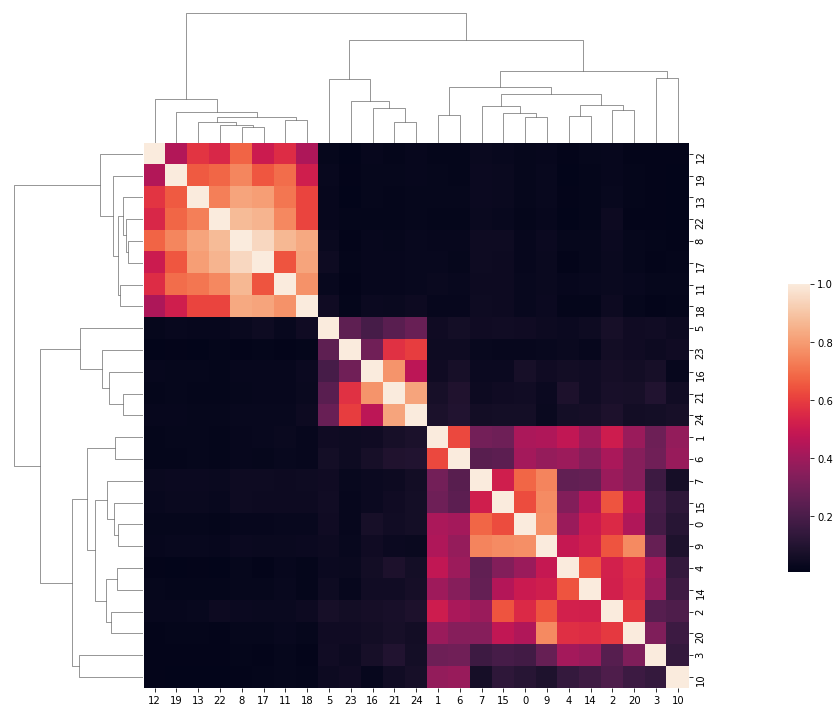

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(sim_matrix, cbar_pos=(1.1, .2, .03, .4))
plt.show()

### Hierarchical linkage clustering using `sklearn`

In [6]:
from scipy.cluster.hierarchy import linkage, fcluster

# Build linkage clustering
Z = linkage(sim_matrix)

# Get labelling with a cut of 3 clusters
labels = fcluster(Z, 3, criterion="maxclust")

### Compute and plot silhouette score at various cuts

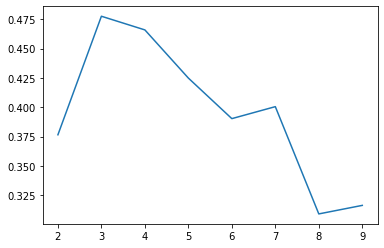

In [7]:
from sklearn.metrics import silhouette_score


# Transform the similarity matrix to a distance matrix
# as needed for a silhouette score computation

dist_matrix = np.zeros_like(sim_matrix)
for index, _ in np.ndenumerate(sim_matrix):
    dist_matrix[index] = 1 - sim_matrix[index]
    

# Compute silhouette scores at different cuts
sil_scores = list()
for n_clust in range(2, 10):
    nodes = fcluster(Z, n_clust, criterion="maxclust")
    sil_scores.append(silhouette_score(dist_matrix, nodes, metric='precomputed'))
    
sns.lineplot(x=range(2, 10), y=sil_scores)